
# Analizando datos de ecobici de los meses de enero a abril del año 2020
### Paradigmas de la computación para ciencia de datos

- Acosta Imandt Daniel

- Barón Bárcenas Iván

- Castillo del Valle Pablo David

## Introducción
Estamos interesados en el ánalisis de los datos de el sistema de transporte de ecobici, esto ya que es muy necesario mejorar el tiempo y la calidad de traslado de los ciudadanos, así mismo nos interesa invertir en proyectos que no generen contaminación, por eso nos fijamos en las bicicletas, además de que son bien cool.

Vamos a hacer un pequeño ánalisis de como estan distribuidas las estaciones en las colonias, haciendo un ánalisis jerárquico.
Pasamos a checar el perfil de los usarios que suelen utilizar este medio.
Y por último  vamos a hacer distintas series de tiempo, para ver cuales son las horas y los días que más se utilizan las bicicletas, tambien veremos el gran cambio que generó la cuarentena del covid a la movilidad de los ciudadanos.

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd




Los datos se consiguieron en las siguientes ligas:
https://datos.cdmx.gob.mx/dataset/estaciones-de-ecobici (la localización de las estaciones de ecobici(nota: la ultima vez que se checo no estaba disponible, pero ya se habia descargado, vienen adjuntos))
https://www.ecobici.cdmx.gob.mx/es/informacion-del-servicio/open-data  (  los viajes de cada usario (los datos que se utilizaron son de enero 2020 a abril 2020))

A continuación se presentan una muestra de los datos:

In [ ]:
 #@title Datos ecobici
 df = pd.read_csv('/content/estaciones-de-ecobici.csv')
 df.tail(5)

,ID,Nombre,Dirección,Número,Código postal,districtCode,Colonia,altitude,nearbyStations/0,location/lat,location/lon,Tipo de estación,nearbyStations/1,nearbyStations/2,nearbyStations/3,nearbyStations/4,nearbyStations/5,punto_geo
475,156,156 TEPIC-AMENALCO,156 - Tepic-Amenalco,S/N,NaN,ROM,Roma Sur,NaN,153,19.407121,-99.162202,BIKE,155.0,162.0,NaN,NaN,NaN,"19.407121,-99.162202"
476,162,162 TEHUANTEPEC-MEDELLÍN,162 - Tehuantepec-Medellín,S/N,NaN,ROM,Roma Sur,NaN,161,19.404907,-99.162485,BIKE,165.0,NaN,NaN,NaN,NaN,"19.404907,-99.162485"
477,410,410 PROLONGACIÓN TAJÍN-PROLONGACIÓN REPÚBLICAS,410 - Prolongación Tajín-Prolongación Repúblicas,S/N,3310.0,SCA,Santa Cruz Atoyac,NaN,407,19.365640,-99.158063,BIKE,408.0,409.0,NaN,NaN,NaN,"19.36564,-99.158063"
478,411,411 PARROQUIA-AVENIDA MÉXICO-COYOACAN,411 - Parroquia-Avenida México-Coyoacan,S/N,3310.0,SCA,Santa Cruz Atoyac,NaN,412,19.367864,-99.163626,BIKE,425.0,427.0,NaN,NaN,NaN,"19.367864,-99.163626"
479,380,380 MORAS-SAN LORENZO,380 - Moras-San Lorenzo,S/N,3200.0,TLA,Tlacoquemecatl,NaN,392,19.374876,-99.173512,BIKE,393.0,394.0,NaN,NaN,NaN,"19.374876,-99.173512"




---


olo nos interesan unas columnas así que simplificamos nuestro dataframe.

In [ ]:
#@title Los datos simplificados son
D2 = df[['Nombre', 'ID','punto_geo','Colonia','location/lat','location/lon']]
D2=D2.rename(columns={"location/lat": "latitude", "location/lon": "longitude"})
loc=D2[['latitude','longitude']]
D2.head()

,Nombre,ID,punto_geo,Colonia,latitude,longitude
0,86 SULLIVAN-INSURGENTES,86,"19.432378,-99.159077",Ampliación Granada,19.432378,-99.159077
1,250 DARWIN-MARIANO ESCOBEDO,250,"19.429057,-99.17966",Ampliación Granada,19.429057,-99.179660
2,273 LUIS DONALDO COLOSIO-AV. CENTRAL,273,"19.442707,-99.152956",Ampliación Granada,19.442707,-99.152956
3,278 MIER Y PESADO-OBRERO MUNDIAL,278,"19.40071,-99.163831",Ampliación Granada,19.400710,-99.163831
4,305 AVENIDA DEL PARQUE-ARIZONA,305,"19.394693,-99.175531",Ampliación Granada,19.394693,-99.175531




---


Ahora vamos a contar cuantas colonias diferentes hay, para hacer un análisis de agrupamiento, donde nuestra k será la cantidad de colonias

In [ ]:
D2.Colonia.value_counts()
print("La cantidad de colonias en las que están distribuidas las ecobicis son {}".format(len(D2.Colonia.value_counts())))

La cantidad de colonias en las que están distribuidas las ecobicis son 50




---


Vemos como se ven nuestros datos distribuidos según su localización geográfica

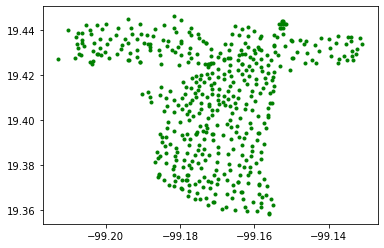

In [ ]:
#@title Gráfica de localización geográfica
for i in range(len(D2)):
    y, x = np.array(D2.punto_geo[i].split(','), float)
    plt.scatter(x,y, marker = '.', color = 'g')

Fijandonos en los puntos periféricos, podemos encontrar un mapa de la zona.

In [ ]:
coor=((D2.longitude.min(),D2.longitude.max(),D2.latitude.min(),D2.latitude.max()))
coor

(-99.212845, -99.13091800000001, 19.35827, 19.446073000000002)

Subimos un mapa dela zona y graficamos la localización de las estaciones de ecobici

In [ ]:
ruh_m = plt.imread('map.png')

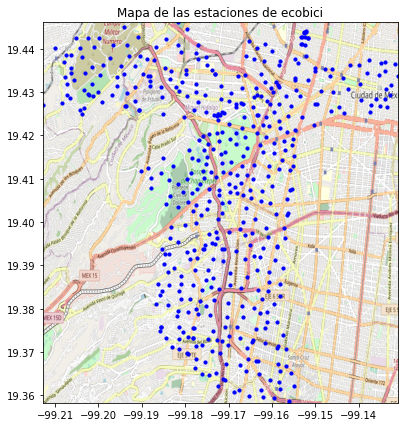

In [ ]:
#@title Mapa de la zona con la localización geográfica de las estaciones de ecobici
coor=((D2.longitude.min(),D2.longitude.max(),D2.latitude.min(),D2.latitude.max()))
ruh_m = plt.imread('map.png')
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(D2.longitude, D2.latitude, zorder=1, alpha=1, c='b', s=10)
ax.set_title('Mapa de las estaciones de ecobici')
ax.set_xlim(coor[0],coor[1])
ax.set_ylim(coor[2],coor[3])
ax.imshow(ruh_m, zorder=0, extent = coor, aspect= 'equal')

Sacando el dendograma vemos que nos recomienda agrupar dos clusters, lo cuál dista mucho a los 50 que tenemos planeados de acuerdo a las colonias que encontramos anteriormente

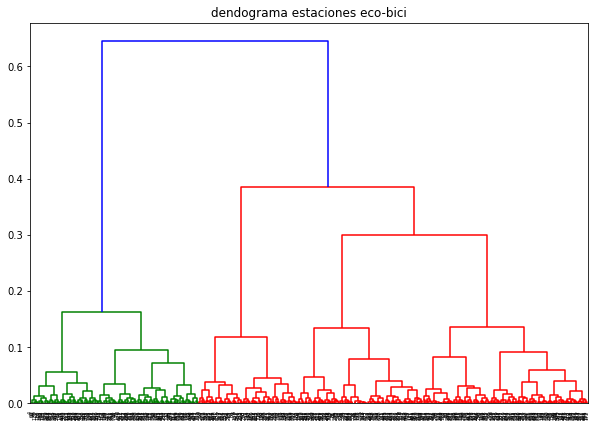

In [ ]:
#@title Dendograma
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('dendograma estaciones eco-bici')
dend=shc.dendrogram(shc.linkage(loc,method='ward'))


In [ ]:
#@title Hacemos el fit de los datos y obteniemos su agrupamiento
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=50,affinity='euclidean',linkage='ward')
cluster.fit_predict(loc)

array([14, 27, 29, 35, 13, 13, 27, 24, 46, 34, 29,  3,  2, 35, 23, 39, 12,
        1, 11, 43, 13, 13, 10, 41, 30, 38, 33,  6, 40, 49, 37,  5, 25, 25,
       43,  9, 11,  3, 25,  5, 32, 29, 36, 19, 26, 13, 11, 20, 32, 21, 13,
       45, 22, 22,  3,  1, 30,  6, 40,  6, 41,  8, 48, 48, 48, 10, 34, 30,
        4, 28, 45,  3, 44,  0, 26, 18, 11, 32, 29,  2,  4, 36, 36, 49, 26,
        4, 15, 19, 28, 17, 42, 36, 37, 13, 13, 22,  1, 11,  1,  1, 41, 38,
       26,  4, 14, 21, 43,  4, 44, 42, 13, 24, 17, 17, 42,  2, 12, 34,  4,
       31, 14, 38, 22, 13, 13, 10,  1, 38, 30,  6, 28, 21,  5, 14, 39, 16,
        9, 32,  7, 11, 29, 16,  2,  0,  0, 47, 35, 11, 19, 26, 15, 31, 12,
       31, 14, 13,  2, 27, 33,  6, 21,  3, 25, 19, 18,  1,  0,  7,  3, 19,
       15, 28, 31, 11, 11, 45, 23,  2, 10,  8, 41, 37,  6,  6, 40, 49, 28,
       39, 49, 12,  0, 30, 37, 43,  1,  9, 40, 32, 29, 35, 19, 23,  2, 47,
       13, 41, 14, 14, 33, 14, 33,  6,  6, 40, 33, 48, 10, 32, 22, 12, 14,
       25, 29, 17,  0,  0

La imagen de la derecha fue obtenida a partir de nuestro analisis jerarquico por aglomeración.

Mientras que la de la izquierda por fue obtenida con los datos reales agrupados por colonia.

Cabe recalcar que el análisis jerarquico fue hecho utilizando la distancia euclideana, esto porque consideramos que las calles de la Ciudad de México son propocias al análisis con otras métricas, por ejemplo la Manhattan.

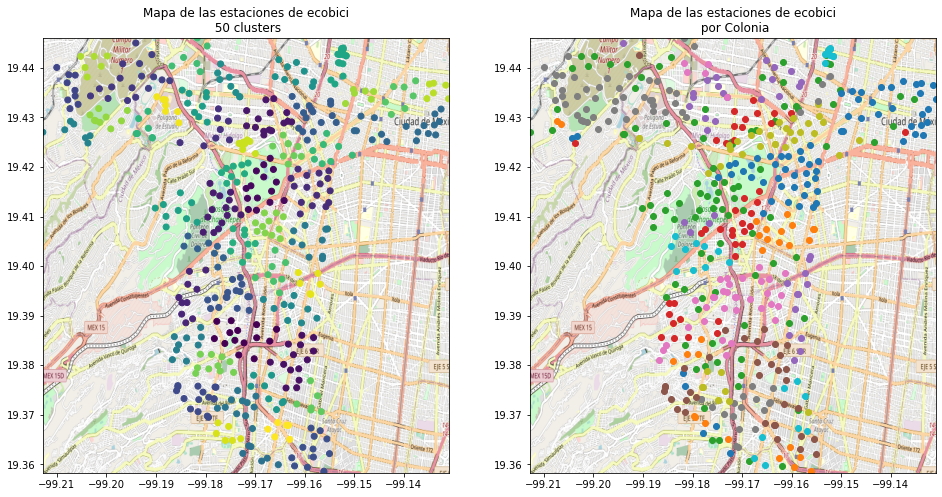

In [ ]:
#@title Clusterización de los datos
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(16, 14))
ax1.scatter(D2['longitude'],D2['latitude'],c=cluster.labels_)
ax1.set_title('Mapa de las estaciones de ecobici\n 50 clusters')
ax2.set_title('Mapa de las estaciones de ecobici\n por Colonia')
ax1.set_xlim(coor[0],coor[1])
ax1.set_ylim(coor[2],coor[3])
groups = D2.groupby("Colonia")
for name, group in groups:
    plt.plot(group["longitude"], group["latitude"], marker="o", linestyle="", label=name)
ax1.imshow(ruh_m, zorder=0, extent = coor, aspect= 'equal')
ax2.imshow(ruh_m, zorder=0, extent = coor, aspect= 'equal')




---


Ahora vamos a cargar los datos de los viajes que  hubo de enero del 2020 a abril del 2020

In [ ]:
#@title Datos de los viajes
enero='/content/2020-01.csv'
febrero='/content/2020-02.csv'
marzo='/content/2020-03 (1).csv'
abril='/content/2020-04.csv'
enero=pd.read_csv(enero,
                    #nrows = 100000,
                    header = 0)
febrero=pd.read_csv(febrero,
                    #nrows = 100000,
                    header = 0)
marzo=pd.read_csv(marzo,
                    #nrows = 100000,
                    header = 0)
abril=pd.read_csv(abril,
                    #nrows = 100000,
                    header = 0)
abril.tail()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
149113,F,27,9269,430,30/04/2020,23:20:35,87,30/04/2020,23:55:49
149114,M,32,7864,174,30/04/2020,23:53:31,174,30/04/2020,23:56:19
149115,M,21,7755,471,30/04/2020,23:44:53,471,30/04/2020,23:58:14
149116,M,27,7593,165,30/04/2020,23:46:58,42,30/04/2020,23:58:16
149117,F,42,12507,295,30/04/2020,23:46:10,348,30/04/2020,23:59:31


Comprimimos todos los meses en un solo dataframe y le agregamos una columa para poder sumar los viajes de forma más sencilla después

In [ ]:
#@title Datos totales
meses = pd.concat([enero,febrero,marzo,abril], axis=0)
meses['factor']=1
meses.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,factor
0,F,33,8744,52,01/01/2020,0:05:06,3,01/01/2020,0:13:00,1
1,M,30,7865,31,01/01/2020,0:09:50,271,01/01/2020,0:21:30,1
2,F,36,7819,251,01/01/2020,0:13:25,150,01/01/2020,0:26:10,1
3,F,33,11258,3,01/01/2020,0:15:22,1,01/01/2020,0:25:29,1
4,M,29,7722,136,01/01/2020,0:18:42,63,01/01/2020,0:24:01,1




---


Ahora dividimos los datos en los viajes que fueron por mujeres y por hombres, para tratar de ver que segmento de la población utiliza más este servicio, así mismo los segmentaremos por distintas edades.

Obtenemos una grafica piramidal de población para ver los segmentos que utilizan más ecobici

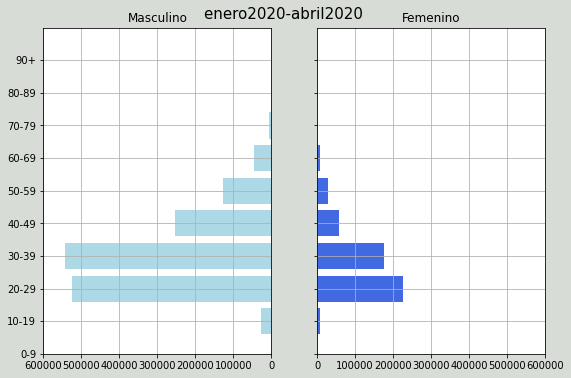

In [ ]:
#@title Gráfica piramidal 
mesesF=meses[meses.Genero_Usuario== 'F']
mesesM=meses[meses.Genero_Usuario=='M']
bins=[10,20,30,40,50,60,70,80,90,200]
mesesF['Edad_Usuario'].value_counts(bins=bins, sort=False)
mesesM['Edad_Usuario'].value_counts(bins=bins, sort=False)
piramide = pd.DataFrame({
   'Edad': ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+'],
   'Masculino': [0, 27674, 525289, 542162, 254204,128464, 45670, 6627, 16, 3],
   'Femenino': [0, 8079,225435 , 176919, 57211, 28298, 6570, 501, 30, 2]
})
#define x and y limits
y = range(0, len(piramide))
x_male = piramide['Masculino']
x_female = piramide['Femenino']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"enero2020-abril2020 ", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='lightblue')
axes[0].set(title='Masculino')
axes[0].axis([0,600000,0,10])
axes[1].axis([0,600000,0,10])
axes[1].barh(y, x_female, align='center', color='royalblue')
axes[1].set(title='Femenino')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=piramide['Edad'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

A partir de esto podemos ver claramente que los hombres utilizan mucho más este servicio que las mujeres y el rango de edad principal esta entre los 20 y 40 años.



---


Ahora haremos el análisis de series de tiempo, para ver que días se utilizan más, así mismo las horas más concurridas y veremos si es posible encontrar algún patrón de comportamiento.

In [ ]:
meses = pd.concat([enero,febrero,marzo,abril], axis=0)
meses['factor']=1
meses.head(5)

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,factor
0,F,33,8744,52,01/01/2020,0:05:06,3,01/01/2020,0:13:00,1
1,M,30,7865,31,01/01/2020,0:09:50,271,01/01/2020,0:21:30,1
2,F,36,7819,251,01/01/2020,0:13:25,150,01/01/2020,0:26:10,1
3,F,33,11258,3,01/01/2020,0:15:22,1,01/01/2020,0:25:29,1
4,M,29,7722,136,01/01/2020,0:18:42,63,01/01/2020,0:24:01,1


Se hace una limpieza horrible de los datos, ya que al parecer el mundo no se  puede poner de acuerdo en que formato de calendario usar.
Del mismo tuvimos fechas erróneas en los .csv que también fueron limpiados.

In [ ]:
import datetime
import warnings
warnings.filterwarnings("ignore")

fecha= meses[['Fecha_Retiro','factor']]
fecha['Fecha_Retiro'] = fecha['Fecha_Retiro'].str.replace('/','-')

fecha["Fecha_Retiro"] = pd.to_datetime(fecha["Fecha_Retiro"], format='%d-%m-%Y')


fecha=fecha.pivot_table(index=['Fecha_Retiro'], aggfunc='size')
fecha=fecha.loc[fecha.index > pd.to_datetime('01/01/2020')]
#fecha=fecha.loc[fecha.index > pd.to_datetime('2020/11/05')]
#pd.to_datetime(fecha[''])





---


Ahora graficamos el uso diario de ecobici, como podemos ver hubo un gran decremento instantáneo en el uso de las bicis a partir del día 16 de Marzo del 2020, que coincide con el comienzo de la cuarentena derivada por el Covid-19.

Por otro lado vemos que hay una gran oscilación de usos diarios, lo que suponemos que se debe a la diferencia de uso entre fines de semana y días laborales. Posteriormente haremos otro ánalisis para ver que tan cierto es nuestra hipótesis.

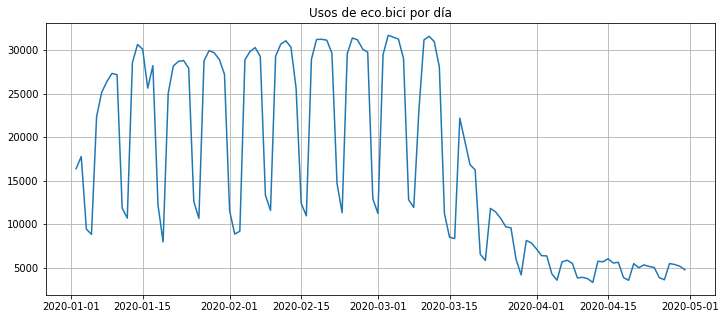

In [ ]:
#@title Gráfica uso de ecobicis por día
plt.figure(figsize=(12,5))
plt.plot(fecha)
plt.title('Usos de eco.bici por día')
plt.grid()
plt.show()

Ahora queremos sacar la media móvil de estos datos, para eso vemos la autocorelacción. 

Al graficar podemos ver que al parecer el 2 y el 7 son buenos números para nuestra ventana.

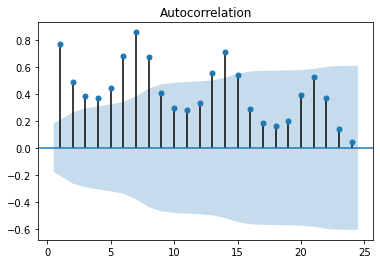

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(fecha, lags=range(1,25))
plt.show()
plt.close()

Hacemos nuestro análisis de la series, utilizando la media móvil.

Y con los parámetros que obtuvimos en la sección anterior.

In [ ]:
#@title Se hace el análisis de las series de tiempo
#metricas
from sklearn.metrics import mean_absolute_error

def mean_absolute_porcentage_error(y_true,y_pred):
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

#media movil
def moving_ave(serie,n):
  ##calcula ma media móvil de una serie de tiempo
  #recibe: serie:np.array con los datos de la serie
  # n : el retraso de la ventana para calcular la media móvil
  #regresa: un escalar con los datos de la media para la ventrana indicada
  return np.average(serie[-n:])

def plot_MA(serie, window,plot_intervals=False,scale=1.96,plot_anomlies=False):
  rolling_mean = serie.rolling(window=window).mean()
  plt.figure(figsize=(15,5))
  plt.title('Media móvil \n tamaño de ventana={}'.format(window))
  plt.plot(rolling_mean,'g', label='Tendencia')
  if plot_intervals:
    mae=mean_absolute_error(serie[window:],rolling_mean[window:])
    dev=np.std(serie[window:]-rolling_mean[window:])
    upper_ =rolling_mean-(mae+scale*dev)
    lower_ =rolling_mean+(mae+scale*dev)
    plt.plot(upper_,'r--',label='limites superior/inferior')
    plt.plot(lower_,'r--')
    if plot_anomlies:
      anomalies =pd.DataFrame(index=serie.index,columns=serie.columns)
      anomalies[serie < lower_] =serie[serie < lower_]
      anomalies[serie > upper_] =serie[serie > lower_]
      plt.plot(anomalies, 'ro',markersize=10)

  plt.plot(serie[window:],label='valores reales')
  plt.legend(loc='upper left')
  plt.grid(True)

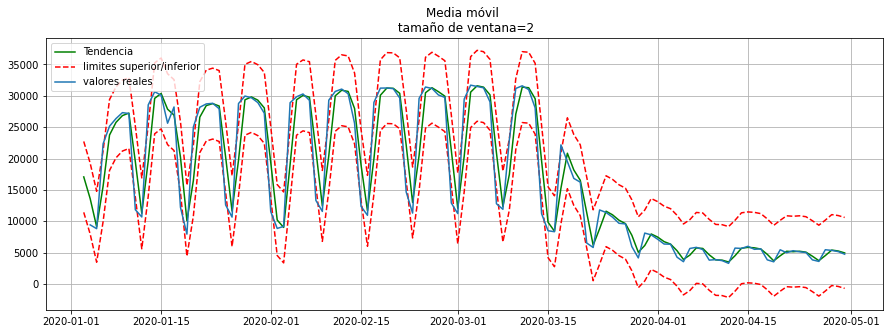

In [ ]:
plot_MA(fecha,2,plot_intervals=True,scale=1)

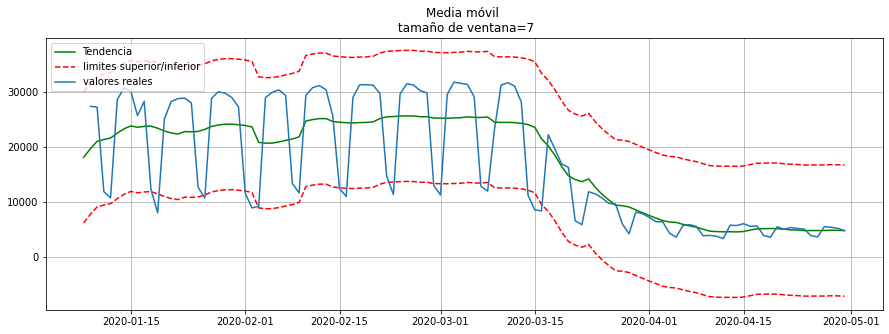

In [ ]:
plot_MA(fecha,7,plot_intervals=True,scale=1)

Aquí notamos que al sacar la media cada 7, se olvida casi por completo las oscilaciones. Esto se puede deber a que una  semana tiene 7 días, por lo que parece que vemos la media de uso por semana.

También notemos que antes de empezar la cuarentena este número parece no varia demasiado, lo que nos indica que el uso de las ecobicis ha sido constante pre-pandemia.

Así mismo el 2 se comporta de una forma casi igual a nuestra gráfica, esto se debe a que  nuestra ventana de tiempo es muy corta.



---

Lo que haremos a continuación va a ser obtener la proyección de el uso de las ecobicis, antes de la pandemia.

Es decir, obtener una predicción del uso de las ecobicis si no hubiera sucedido la cuarentena.

Esto lo haremos mediante Holt-Winters

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
# Dividimos nuestros datos de prueba y de entrenamiento
df_train=fecha.iloc[:-50]
df_test=fecha.iloc[-50:]
#Hacemos el ajuste
model=HWES(df_train)
fitted = model.fit()
sales_forecast = fitted.forecast(steps=50)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


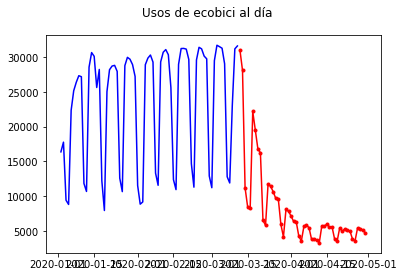

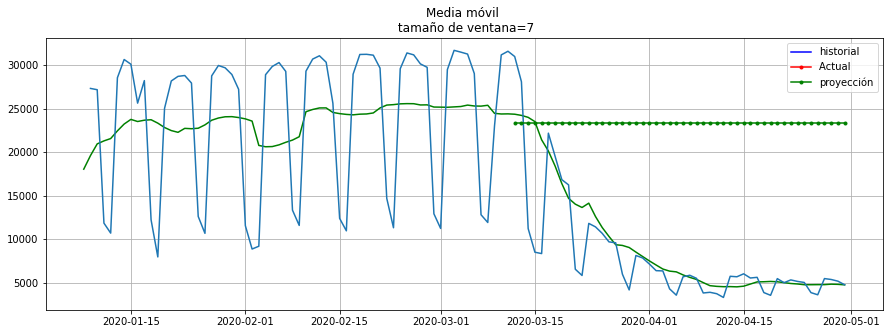

In [ ]:
#@title Holt-Winters
#Vemos nuestra gráfica con valores históricos nuestra proyección y los valores reales
#Modificar y juntar
fig = plt.figure()
fig.suptitle('Usos de ecobici al día')
past, = plt.plot(df_train.index, df_train, 'b', label='historial')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual ')
plot_MA(fecha,7)
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='proyección')
plt.legend(handles=[past, future, predicted_future])
plt.show()

Como podemos ver nuestro pronostico fallo de manera estrepitosa, esto se debe a que el modelo que usamos para predecir a futuro solo toma en cuenta los usos de días pasados y en ningún momento metimos variables fuera de estas, como puede ser, la información, de que el covid ya estaba en la ciudad o que se planeaba hacer cuarentena.

Tambien podemos ver que nuestra proyección sigue muy parecida a la media movil de 7.



---


Ahora veremos la diferencia del uso de las ecobicis entre semana y en fin de semana.

Para eso primero buscamos las fechas de fin de semana en el calendario y dividimos nuestros datos.

Pero antes, acondicionaremos nuestros datos a nuestras necesidades

In [ ]:
#@title Más limpieza de datos
import datetime
meses['factor']=1
fecha= meses[['Fecha_Retiro','factor']]
fecha['Fecha_Retiro'] = fecha['Fecha_Retiro'].str.replace('/','-')

fecha["Fecha_Retiro"] = pd.to_datetime(fecha["Fecha_Retiro"], format='%d-%m-%Y')


fecha=fecha.pivot_table(index=['Fecha_Retiro'], aggfunc='size')
fecha=fecha.loc[fecha.index > pd.to_datetime('01/01/2020')]
#fecha=fecha.loc[fecha.index > pd.to_datetime('2020/11/05')]
#pd.to_datetime(fecha[''])
fecha.head()

Fecha_Retiro
2020-01-02    16374
2020-01-03    17766
2020-01-04     9417
2020-01-05     8812
2020-01-06    22354
dtype: int64

In [ ]:
#@title Agrupamiento por fines de semana y días entre semana
meses = pd.concat([enero,febrero,marzo,abril], axis=0)
fechafinde=meses

fechafinde=meses[(meses.Fecha_Retiro== '04/01/2020')|(meses.Fecha_Retiro== '05/01/2020')|(meses.Fecha_Retiro== '11/01/2020')|(meses.Fecha_Retiro== '12/01/2020')|(meses.Fecha_Retiro== '18/01/2020')|(meses.Fecha_Retiro== '19/01/2020')
|(meses.Fecha_Retiro== '25/01/2020')|(meses.Fecha_Retiro== '26/01/2020')|(meses.Fecha_Retiro== '02/02/2020')|(meses.Fecha_Retiro== '01/02/2020')|(meses.Fecha_Retiro== '08/02/2020')|(meses.Fecha_Retiro== '09/02/2020')|(meses.Fecha_Retiro== '15/02/2020')
|(meses.Fecha_Retiro== '16/02/2020')|(meses.Fecha_Retiro== '22/02/2020')|(meses.Fecha_Retiro== '23/02/2020')|(meses.Fecha_Retiro== '29/02/2020')|(meses.Fecha_Retiro== '01/03/2020')|(meses.Fecha_Retiro== '07/03/2020')
|(meses.Fecha_Retiro== '08/03/2020')|(meses.Fecha_Retiro== '14/03/2020')|(meses.Fecha_Retiro== '15/03/2020')|(meses.Fecha_Retiro== '21/03/2020')|(meses.Fecha_Retiro== '22/03/2020')|(meses.Fecha_Retiro== '28/03/2020')|(meses.Fecha_Retiro== '29/03/2020')
|(meses.Fecha_Retiro== '04/04/2020')|(meses.Fecha_Retiro== '05/04/2020')|(meses.Fecha_Retiro== '11/04/2020')|(meses.Fecha_Retiro== '12/04/2020')|(meses.Fecha_Retiro== '18/04/2020')|(meses.Fecha_Retiro== '19/04/2020')|(meses.Fecha_Retiro== '25/04/2020')|(meses.Fecha_Retiro== '26/04/2020')]
fechafinde['factor']=1

meses = pd.concat([enero,febrero,marzo,abril], axis=0)
fechafinno=meses
fechafinno=meses[(meses.Fecha_Retiro!= '04/01/2020')&(meses.Fecha_Retiro!= '05/01/2020')&(meses.Fecha_Retiro!= '11/01/2020')&(meses.Fecha_Retiro!= '12/01/2020')&(meses.Fecha_Retiro!= '18/01/2020')&(meses.Fecha_Retiro!= '19/01/2020')
&(meses.Fecha_Retiro!= '25/01/2020')&(meses.Fecha_Retiro!= '26/01/2020')&(meses.Fecha_Retiro!= '02/02/2020')&(meses.Fecha_Retiro!= '01/02/2020')&(meses.Fecha_Retiro!= '08/02/2020')&(meses.Fecha_Retiro!= '09/02/2020')&(meses.Fecha_Retiro!= '15/02/2020')
&(meses.Fecha_Retiro!= '16/02/2020')&(meses.Fecha_Retiro!= '22/02/2020')&(meses.Fecha_Retiro!= '23/02/2020')&(meses.Fecha_Retiro!= '29/02/2020')&(meses.Fecha_Retiro!= '01/03/2020')&(meses.Fecha_Retiro!= '07/03/2020')
&(meses.Fecha_Retiro!= '08/03/2020')&(meses.Fecha_Retiro!= '14/03/2020')&(meses.Fecha_Retiro!= '15/03/2020')&(meses.Fecha_Retiro!= '21/03/2020')&(meses.Fecha_Retiro!= '22/03/2020')&(meses.Fecha_Retiro!= '28/03/2020')&(meses.Fecha_Retiro!= '29/03/2020')
&(meses.Fecha_Retiro!= '04/04/2020')&(meses.Fecha_Retiro!= '05/04/2020')&(meses.Fecha_Retiro!= '11/04/2020')&(meses.Fecha_Retiro!= '12/04/2020')&(meses.Fecha_Retiro!= '18/04/2020')&(meses.Fecha_Retiro!= '19/04/2020')&(meses.Fecha_Retiro!= '25/04/2020')&(meses.Fecha_Retiro!= '26/04/2020')]
fechafinno['factor']=1



In [ ]:
#@title Limpieza 2.0
import datetime
fechafinde= fechafinde[['Fecha_Retiro','factor']]
fechafinde['Fecha_Retiro'] = fechafinde['Fecha_Retiro'].str.replace('/','-')
fechafinde["Fecha_Retiro"] = pd.to_datetime(fechafinde["Fecha_Retiro"], format='%d-%m-%Y')
fechafinde=fechafinde.pivot_table(index=['Fecha_Retiro'], aggfunc='size')
fechafinde=fechafinde.loc[fechafinde.index > pd.to_datetime('01/01/2020')]
#fecha=fecha.loc[fecha.index > pd.to_datetime('2020/11/05')]
#pd.to_datetime(fecha[''])
fechafinde.head()


Fecha_Retiro
2020-01-04     9417
2020-01-05     8812
2020-01-11    11829
2020-01-12    10681
2020-01-18    12205
dtype: int64

In [ ]:
#@title Limpieza 3.0
fechafinno= fechafinno[['Fecha_Retiro','factor']]
fechafinno['Fecha_Retiro'] = fechafinno['Fecha_Retiro'].str.replace('/','-')

fechafinno["Fecha_Retiro"] = pd.to_datetime(fechafinno["Fecha_Retiro"], format='%d-%m-%Y')


fechafinno=fechafinno.pivot_table(index=['Fecha_Retiro'], aggfunc='size')
fechafinno=fechafinno.loc[fechafinno.index > pd.to_datetime('01/01/2020')]
#fecha=fecha.loc[fecha.index > pd.to_datetime('2020/11/05')]
#pd.to_datetime(fecha[''])
fechafinno.head()


Fecha_Retiro
2020-01-02    16374
2020-01-03    17766
2020-01-06    22354
2020-01-07    25157
2020-01-08    26373
dtype: int64

Ahora bien una vez limpios los datos, procedemos aver si existe alguna relación entre la distribuciín de los datos es decir a lo largo del tiempo, con respecto al número de viajes.

Para esto haremos uso de técnicas de clusterización


<Figure size 2880x1920 with 0 Axes>

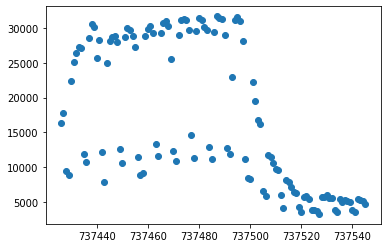

In [ ]:
#@title Preparamos los datos para ser usados por las funciones de sklearn y graficamos nuestros datos
from matplotlib.pyplot import figure
import datetime as dt
copia=fechafinde
copia=copia.reset_index(level=0)
copia["Fecha_Retiro"]=pd.to_datetime(copia["Fecha_Retiro"])
copia["Fecha_Retiro"]=copia["Fecha_Retiro"].map(dt.datetime.toordinal)
arr=copia.to_numpy()
arr=arr.transpose()

copia=fechafinno
copia=copia.reset_index(level=0)
copia["Fecha_Retiro"]=pd.to_datetime(copia["Fecha_Retiro"])
copia["Fecha_Retiro"]=copia["Fecha_Retiro"].map(dt.datetime.toordinal)
arr2=copia.to_numpy()
arr2=arr2.transpose()


data=[list(arr[0])+list(arr2[0]),list(arr[1])+list(arr2[1]), [0]*len(list(arr[0]))+[1]*len(list(arr2[0]))]
figure(figsize=(18, 12), dpi=160)
fig,ax=plt.subplots()
ax.scatter(data[0],data[1])






In [ ]:
#@title Para el punto extra en nuestro proyecto decidimos usar en esta sección un pipeline, el cúal fue uno de los temas que se vió al final del curso, este nos ayudará a hacer hacer los distintos clusterings
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

#Pipeline framework para clustering y graficado, así como obtención de scores
def ClusterPipe(clustermodel, name, data, labs):
  estimador= make_pipeline(StandardScaler(), clustermodel).fit(data)
  mets=[metrics.homogeneity_score, metrics.completeness_score, metrics.v_measure_score, metrics.adjusted_rand_score, metrics.adjusted_mutual_info_score,]
  results = [name]
  y_hat=estimador.fit_predict(data)
  results+=[m(labs, estimador[-1].fit_predict(data)) for m in mets]
  formatter_result=("{:16s}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
  fig,ax=plt.subplots()
  ax.scatter(data[:,0],data[:,1],c=y_hat)
  print(formatter_result.format(*results))



Método          	homo	compl	v-ms	ARI	AMI
K-medias        	0.331	0.290	0.309	0.165	0.305
Aglomerativo    	0.331	0.290	0.309	0.165	0.305
Mezcla Gaussiana	0.322	0.283	0.301	0.150	0.296
Kmedias+Gauss   	0.322	0.283	0.301	0.150	0.296
Kmedias+Agglo   	0.310	0.268	0.287	0.212	0.283


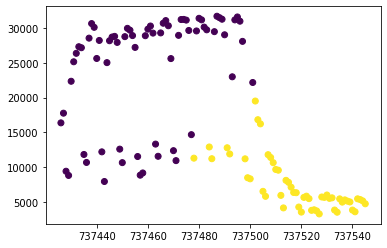

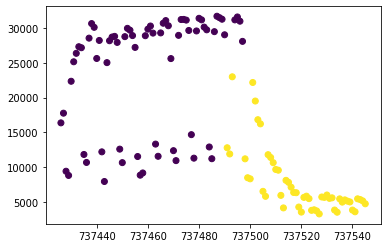

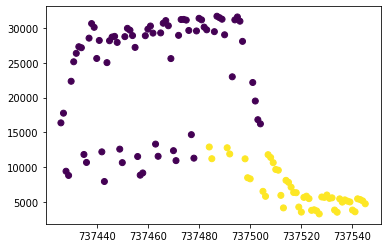

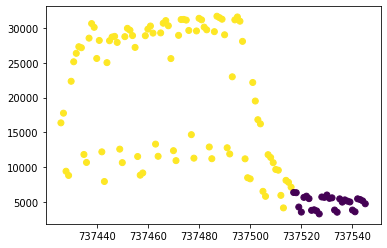

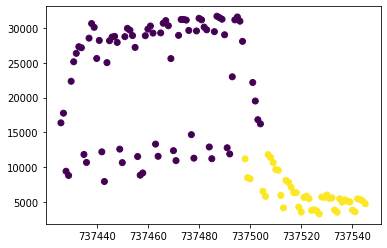

In [ ]:
#@title Utilizamos diversos métodos de clustering y comparamos los resultados con respecto a si los días son fin de semana o no
space=" "
print(f"Método{space*10}\thomo\tcompl\tv-ms\tARI\tAMI")

#Usamos nuestro pipeline con k-medias
finaldata=np.array([data[0],data[1]]).transpose()
kmeansmodel=KMeans(init="k-means++", n_clusters=2)
ClusterPipe(kmeansmodel, name="K-medias", data=finaldata, labs=data[2])


#Usamos nuestro framework Aglomeración
clustering=AgglomerativeClustering(n_clusters=2)
ClusterPipe(clustering, name="Aglomerativo", data=finaldata, labs=data[2])

#Usamos nuestro framework Mezcla Gaussiana
gauss=GaussianMixture(n_components=2)
ClusterPipe(gauss, name="Mezcla Gaussiana", data=finaldata, labs=data[2])

#Usamos nuestro framework con dos pipelines distintos para hacer K-medias y luego Mezcla Gaussiana y para hacer K-medias y luego Aglomeración
ClusterPipe(Pipeline([("kmeans",KMeans(init="k-means++", n_clusters=2)),("gauss",GaussianMixture(n_components=2))]), name="Kmedias+Gauss",  data=finaldata, labs=data[2])
ClusterPipe(Pipeline([("kmeans",KMeans(init="k-means++", n_clusters=2)),("agg",AgglomerativeClustering(n_clusters=2))]), name="Kmedias+Agglo",  data=finaldata, labs=data[2])

Notamos que a todos los métodos de clustering resultan ser ineficientes, su efectividad según nuestras métricas de evaluación terminan siendo por debajo del 50%

Esto tiene diversos motivos, por un lado, los métodos de clusterización efectivamente nos detectan un acontecimiento importante en la distribución de nuestros datos, sin embargo este no es el que queremos.

Los métodos de clusterización nos detectan la caida del uso de las ecobicis derivada de la pandemia. Lo cuál aunque útil no es precisamente lo que queremos.

Esto nos enseña que anamolias en el historial de nuestros datos nos pueden llegar a arruinar un análisis. Es por eso que siempre hay que tener en cuenta el contexto histórico y social de los datos que estamos analizando.

En este caso si hubieramos seleccionado únicamente los datos pre pandemia es probable que nuestros algoritmos de clusterización nos hubieran arrojado mejores resultados.

<Figure size 2880x1920 with 0 Axes>

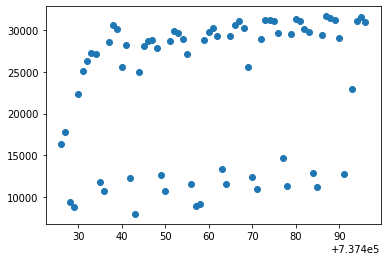

In [ ]:
#@title Quitando los datos postpandemia veamos si esta vez nuestros algoritmos de clustering logran encontrar un patrón
from matplotlib.pyplot import figure
import datetime as dt
copia=fechafinde
copia=copia.reset_index(level=0)
copia=copia.sort_values(by=["Fecha_Retiro"])
copia2=copia.drop(copia.tail(15).index)
copia=copia2
copia["Fecha_Retiro"]=pd.to_datetime(copia["Fecha_Retiro"])
copia["Fecha_Retiro"]=copia["Fecha_Retiro"].map(dt.datetime.toordinal)
arr=copia.to_numpy()
arr=arr.transpose()

copia=fechafinno
copia=copia.reset_index(level=0)
copia=copia.sort_values(by=["Fecha_Retiro"])
copia2=copia.drop(copia.tail(35).index)
copia=copia2
copia["Fecha_Retiro"]=pd.to_datetime(copia["Fecha_Retiro"])
copia["Fecha_Retiro"]=copia["Fecha_Retiro"].map(dt.datetime.toordinal)
arr2=copia.to_numpy()
arr2=arr2.transpose()


data=[list(arr[0])+list(arr2[0]),list(arr[1])+list(arr2[1]), [0]*len(list(arr[0]))+[1]*len(list(arr2[0]))]
figure(figsize=(18, 12), dpi=160)
fig,ax=plt.subplots()
ax.scatter(data[0],data[1])

Método          	homo	compl	v-ms	ARI	AMI
K-medias        	0.786	0.738	0.761	0.829	0.758
Aglomerativo    	0.786	0.738	0.761	0.829	0.758
Mezcla Gaussiana	0.786	0.738	0.761	0.829	0.758
Kmedias+Gauss   	0.786	0.738	0.761	0.829	0.758
Kmedias+Agglo   	0.786	0.738	0.761	0.829	0.758


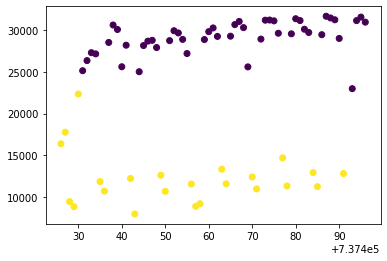

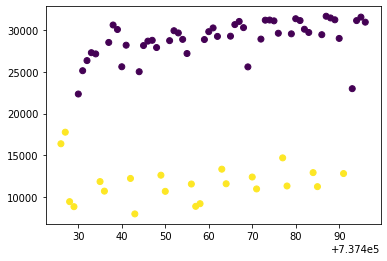

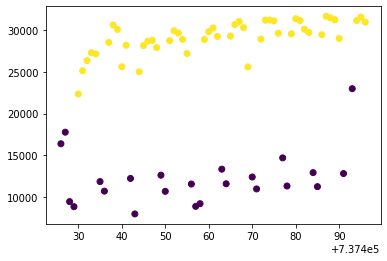

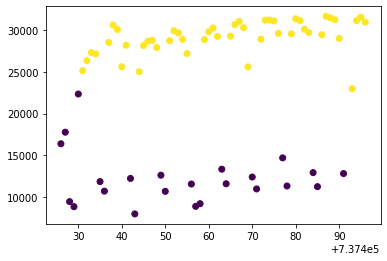

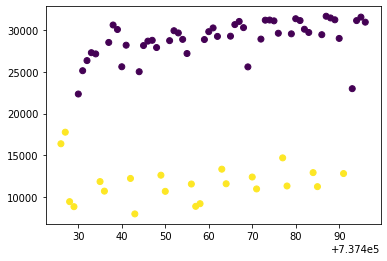

In [ ]:
#@title Utilizamos diversos métodos de clustering y comparamos los resultados con respecto a si los días son fin de semana o no
space=" "
print(f"Método{space*10}\thomo\tcompl\tv-ms\tARI\tAMI")

#Usamos nuestro pipeline con k-medias
finaldata=np.array([data[0],data[1]]).transpose()
kmeansmodel=KMeans(init="k-means++", n_clusters=2)
ClusterPipe(kmeansmodel, name="K-medias", data=finaldata, labs=data[2])


#Usamos nuestro framework Aglomeración
clustering=AgglomerativeClustering(n_clusters=2)
ClusterPipe(clustering, name="Aglomerativo", data=finaldata, labs=data[2])

#Usamos nuestro framework Mezcla Gaussiana
gauss=GaussianMixture(n_components=2)
ClusterPipe(gauss, name="Mezcla Gaussiana", data=finaldata, labs=data[2])

#Usamos nuestro framework con dos pipelines distintos para hacer K-medias y luego Mezcla Gaussiana y para hacer K-medias y luego Aglomeración
ClusterPipe(Pipeline([("kmeans",KMeans(init="k-means++", n_clusters=2)),("gauss",GaussianMixture(n_components=2))]), name="Kmedias+Gauss",  data=finaldata, labs=data[2])
ClusterPipe(Pipeline([("kmeans",KMeans(init="k-means++", n_clusters=2)),("agg",AgglomerativeClustering(n_clusters=2))]), name="Kmedias+Agglo",  data=finaldata, labs=data[2])

En esta ocasión nuestros algoritmos funcionaron mucho mejor y nos dejaron ver que efectivamente si existe un patron definido en nuestros datos, a continuación daremos nuestro análisis y el por qué creemos que se debe ese comportamiento

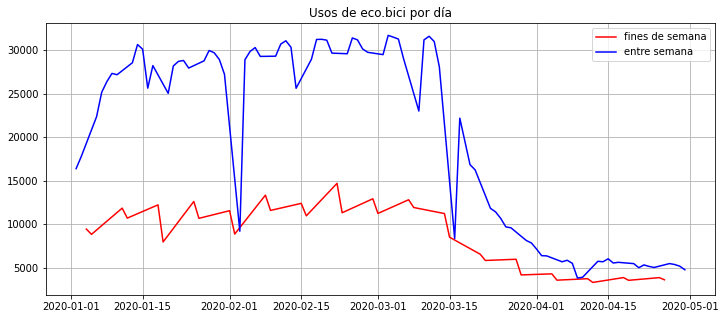

In [ ]:
#@title Comparamos el uso en días laborales y fines de semana
plt.figure(figsize=(12,5))
plt.plot(fechafinde,c='r')
plt.plot(fechafinno,c='b')

plt.title('Usos de eco.bici por día')
plt.legend(['fines de semana','entre semana'])
plt.grid()

plt.show()

Como podemos ver los fines de semana baja por mucho el uso de las ecobici.

Así mismo notamos que en la gráfica azul hay dos momentos en los que el uso de las ecobicis baja abrutamente, esto se debe a que esos días fueron feriados.

De esto concluimos que el mayor uso que se le da a este medio de transporte es para ir a la escuela o el trabajo.




---


Ahora veremos cual es el uso por hora del día  para fines de semana y entre semana, para eso utilizaremos 24 bins en donde cada bin equivale a una hora, y sacaremos el total de usos de ecobici en esas horas.

Nuevamente tenemos que adecuar los datos a nuestros requerimientos

In [ ]:
#@title Limpiando datos
meses['factor']=1
fecha= meses[['Fecha_Retiro','factor']]
fecha['Fecha_Retiro'] = fecha['Fecha_Retiro'].str.replace('/','-')

fecha["Fecha_Retiro"] = pd.to_datetime(fecha["Fecha_Retiro"], format='%d-%m-%Y')


fecha=fecha.pivot_table(index=['Fecha_Retiro'], aggfunc='size')
fecha=fecha.loc[fecha.index > pd.to_datetime('01/01/2020')]
#fecha=fecha.loc[fecha.index > pd.to_datetime('2020/11/05')]
#pd.to_datetime(fecha[''])

fechah=fecha.tail()
fechah

Fecha_Retiro
2020-04-26    3587
2020-04-27    5452
2020-04-28    5346
2020-04-29    5153
2020-04-30    4738
dtype: int64

In [ ]:
#@title Agrupamos por hora del día
meses['factor']=1
horas= meses[['factor','Hora_Retiro']]
horas["Hora_Retiro"] = pd.to_datetime(horas["Hora_Retiro"], format='%H:%M:%S')



#fecha=fecha.loc[fecha.index > pd.to_datetime('2020/11/05')]
#pd.to_datetime(fecha[''])



time_mask0 = (horas['Hora_Retiro'].dt.hour < 1)
            
time_mask1 = (horas['Hora_Retiro'].dt.hour >= 1 ) & \
            (horas['Hora_Retiro'].dt.hour < 2)
time_mask2 = (horas['Hora_Retiro'].dt.hour >= 2 ) & \
            (horas['Hora_Retiro'].dt.hour < 3)

time_mask3 = (horas['Hora_Retiro'].dt.hour >= 3 ) & \
            (horas['Hora_Retiro'].dt.hour < 4)

time_mask4 = (horas['Hora_Retiro'].dt.hour >= 4 ) & \
            (horas['Hora_Retiro'].dt.hour < 5)

time_mask5 = (horas['Hora_Retiro'].dt.hour >= 5 ) & \
            (horas['Hora_Retiro'].dt.hour < 6)

time_mask6 = (horas['Hora_Retiro'].dt.hour >= 6 ) & \
            (horas['Hora_Retiro'].dt.hour < 7)

time_mask8 = (horas['Hora_Retiro'].dt.hour >= 7 ) & \
            (horas['Hora_Retiro'].dt.hour < 8)

time_mask9 = (horas['Hora_Retiro'].dt.hour >= 8 ) & \
            (horas['Hora_Retiro'].dt.hour < 9)

time_mask10 = (horas['Hora_Retiro'].dt.hour >= 9 ) & \
            (horas['Hora_Retiro'].dt.hour < 10)
            
time_mask11 = (horas['Hora_Retiro'].dt.hour >= 10 ) & \
            (horas['Hora_Retiro'].dt.hour < 11)
time_mask12 = (horas['Hora_Retiro'].dt.hour >= 11 ) & \
            (horas['Hora_Retiro'].dt.hour < 12)
time_mask13 = (horas['Hora_Retiro'].dt.hour >= 12 ) & \
            (horas['Hora_Retiro'].dt.hour < 13)

time_mask14 = (horas['Hora_Retiro'].dt.hour >= 13 ) & \
            (horas['Hora_Retiro'].dt.hour < 14)

time_mask15 = (horas['Hora_Retiro'].dt.hour >= 14 ) & \
            (horas['Hora_Retiro'].dt.hour < 15)

time_mask16 = (horas['Hora_Retiro'].dt.hour >= 15 ) & \
            (horas['Hora_Retiro'].dt.hour < 16)

time_mask18 = (horas['Hora_Retiro'].dt.hour >= 16 ) & \
            (horas['Hora_Retiro'].dt.hour < 17)

time_mask19 = (horas['Hora_Retiro'].dt.hour >= 17 ) & \
            (horas['Hora_Retiro'].dt.hour < 18)
time_mask20 = (horas['Hora_Retiro'].dt.hour >= 18 ) & \
            (horas['Hora_Retiro'].dt.hour < 19)
            
time_mask21 = (horas['Hora_Retiro'].dt.hour >= 19 ) & \
            (horas['Hora_Retiro'].dt.hour < 20)
time_mask22 = (horas['Hora_Retiro'].dt.hour >= 20 ) & \
            (horas['Hora_Retiro'].dt.hour < 21)
time_mask23 = (horas['Hora_Retiro'].dt.hour >= 21 ) & \
            (horas['Hora_Retiro'].dt.hour < 22)

time_mask24 = (horas['Hora_Retiro'].dt.hour >= 22 ) & \
            (horas['Hora_Retiro'].dt.hour < 23)
time_mask25 = (horas['Hora_Retiro'].dt.hour >= 23 ) & \
            (horas['Hora_Retiro'].dt.hour < 24)


horas.Hora_Retiro.value_counts()
len(horas.Hora_Retiro.value_counts())


72586

Procedemos a hacer el histograma de los viajes por hora del día

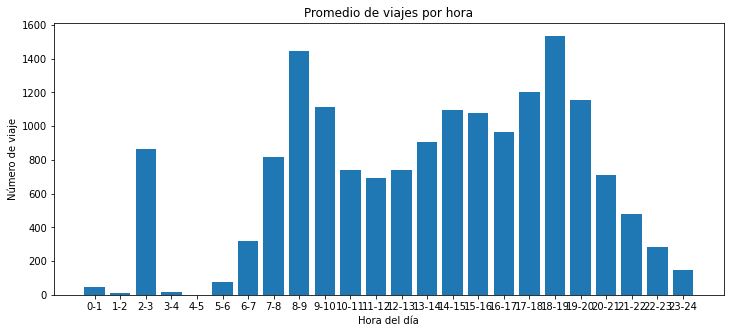

In [ ]:
#@title Graficamos los viajes por hora del día
D={'0-1':np.count_nonzero(time_mask0)/131, '1-2':np.count_nonzero(time_mask1)/131, '2-3':np.count_nonzero(time_mask2), '3-4':np.count_nonzero(time_mask3), '4-5':np.count_nonzero(time_mask4), '5-6':np.count_nonzero(time_mask5)/131, '6-7':np.count_nonzero(time_mask6)/131, '7-8':np.count_nonzero(time_mask8)/131, '8-9':np.count_nonzero(time_mask9)/131, '9-10':np.count_nonzero(time_mask10)/131,'10-11':np.count_nonzero(time_mask11)/131,'11-12':np.count_nonzero(time_mask12)/131,'12-13':np.count_nonzero(time_mask13)/131,'13-14':np.count_nonzero(time_mask14)/131,'14-15':np.count_nonzero(time_mask15)/131,'15-16':np.count_nonzero(time_mask16)/131,'16-17':np.count_nonzero(time_mask18)/131,'17-18':np.count_nonzero(time_mask19)/131,'18-19':np.count_nonzero(time_mask20)/131,'19-20':np.count_nonzero(time_mask21)/131,'20-21':np.count_nonzero(time_mask22)/131,'21-22':np.count_nonzero(time_mask23)/131,'22-23':np.count_nonzero(time_mask24)/131,'23-24':np.count_nonzero(time_mask25)/131}
plt.figure(figsize=(12,5))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title('Promedio de viajes por hora')
plt.ylabel('Número de viaje')
plt.xlabel('Hora del día')
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

Podemos notar ciertas irregularidades en los datos, aún después del inmeso trabajo que fue limpiarlos.

Por ejemplo notamos que existe un uso especialmente elevado de las ecobicis en la madrugada, de 2 a 3 de la mañana. Lo cuál parece poco posible ya que el horario de uso de las ecobicis es de las 5:00 hrs a las 24:00 hrs.

También, podemos notar que entre las 4:00hrs a las 5:00hrs, no hay absolutamente ningún registro.

Este tipo de irregularidades puede ser causada por distintos motivos, desde un llenado erróneo de los datos, un fallo en el sistema para llenar los datos, arrancones ilegales de ecobicis, o hasta puede tratarse de casos de corrupción.

Ahora bien, fuera de las inconstencias, podemos ver que precisamente las horas en las que se utiliza más este medio de son entre las 8:00-10:00 y 18:00-20:00.

Lo cuál le da sustento a nuestra sospecha anterior, la ecobici se usa como medio de transporte para llegar a la escuela y al trabajo. Ya que esas horas son horarios de entrada y cierre de oficinas.

